# 공장을 만들꺼다 모델 공장

### 아이디어는 다음과 같습니다.

# 순서
### 1.전처리 : base 파일은 아무칼럼도 제거하지 않은 파일 -> 우리는 이 파일에서 몇개씩 칼럼을 제거하며 모델의 성능을 파악할 것임
        사용법 : 
        prepro() 함수를 사용하세요
        prepro("파일경로", ["삭제할 칼럼", "삭제할 칼럼2"]) --> 삭제할 칼럼 여러개를 집어넣어도 된다. 단 존재해야함
        prepro("파일경로") --> 삭제할 칼럼을 적지 않으면 삭제하지 않고 원핫인코딩한 pd를 리턴해준다
        df = prepro("파일경로") --> 이런식으로 df에 저장가능함

### 2.데이터 나누기 : 
        사용법 : 
        get() 함수를 사용하세요
        get("파일경로") --> 판다스 파일을 보내주면 알아서 train데이터 test데이터 validation데이터 나눠준다. 
                        비율은 train test가 8대2로 나눠
        X_trn, y_trn, X_tst, y_tst = get('파일경로')  --> 이런식으로 리턴이 총4개 항목이기에 변수 4개에 넣어준다.

### 3.모델 여러개 만들기
        사용법 : 
                앞에 설명 존재

# 커스텀모델 함수를 사용해보자

### 인공신경망 만드는 함수
- factiory_model( 트레이닝 데이터(X값=칼럼=피쳐=열) ,  타겟 데이터(맞춰야하는 데이터) , 하이퍼 파라미터 셋팅한 json파일의 이름)
- -> EX :  factory_model(X_trn, y_trn,'config.json')

          리턴값(아웃풋)은 인공신경망 모델을 리턴함 학습도 가능함
          model = factory_model(X_trn, y_trn,'config.json')
          model.fit(X_trn, y_trn)
### 인공신경망 모델 여러개 만드는 함수
- create_models( 트레이닝 데이터(X값=칼럼=피쳐=열) ,  타겟 데이터(맞춰야하는 데이터), 하이퍼 파라미터 셋팅한 json파일의 이름 'configW.json' 무조건 W가 뒤에 붙어있어야함 , 몇개의 config.json파일을 넣을 것인지 )
- -> EX :  create_models(X_trn, y_trn,'configW.json',2)

          리턴값(아웃풋)은 인공신경망 모델 여러개를 담은 리스트를 리턴함 인덱스로 꺼내서 사용 가능함
          models = create_models(X_trn, y_trn,'configW.json',2)
          model1 = models[0]
### 인공신경만 모델에 대한 교차검증 함수
- CV(모델(한개의 모델), 트레이닝 데이터(X값=칼럼=피쳐=열) ,  타겟 데이터(맞춰야하는 데이터), 5번 교차 검증을 할 것이고 기본값이기에 안적어도 됨)
- -> EX :  CV(m, feature, label, n_splits=5)

          리턴값(아웃풋)은 판다스 데이터프레임이다 교차검증 후 5번 평균의 결과값을 가지고 있음 다음과 같이 프레임 확인도 가능함
          d = CV(m, feature, label, n_splits=5)  
          d.head()
### 인공신경만 모델 여러개에 대한 교차검증 함수
- models_cv(모델들(여러개의 모델), 트레이닝 데이터(X값=칼럼=피쳐=열) ,  타겟 데이터(맞춰야하는 데이터), 5번 교차 검증을 할 것이고 기본값이기에 안적어도 됨)
- -> EX :  models_cv(models, feature, label, n_splits=5)

          리턴값(아웃풋)은 판다스 데이터프레임이다 여러 모델들을 순서대로 하나씩 5번 교차검증 후 데이터 평균 결과값을 한 행마다 스택처럼 쌓아서 리턴함
          d = models_cv(models, feature, label, n_splits=5) 
          d.head()


### 4.모델 여러개 cross validation 교차검증 하기 



### 5.최종 모델 선정

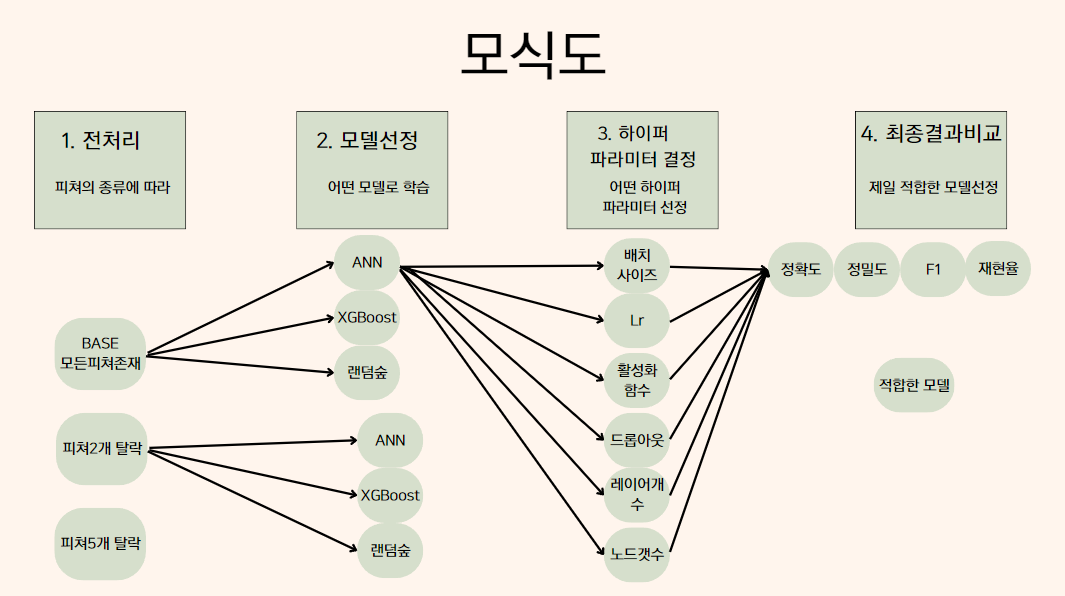

In [2]:
import sys
import os
# 현재 작업 디렉토리를 얻습니다.
current_directory = os.getcwd()
print(current_directory)
# 상위 디렉토리의 경로를 계산합니다.
parent_directory = os.path.abspath(os.path.join(current_directory, '..'))
print(parent_directory )
# 상위 디렉토리를 sys.path에 추가합니다.
sys.path.insert(0, parent_directory)
# 이제 상위 디렉토리의 모듈을 불러올 수 있습니다.
from ANN.factory_model import factory_model, create_models , models_cv
from ANN.cv import ClfiCV, RegCV
from ANN.get import get, prepro
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import torch

# 현재 사용 중인 디바이스 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("현재 사용 중인 디바이스:", device)

c:\Users\user\Desktop\Wassup_firstProject
c:\Users\user\Desktop
현재 사용 중인 디바이스: cuda


# QuickStart

In [13]:
df = prepro("data/base.csv",['사망자수','중상자수','경상자수','부상신고자수','사고내용'])
# df.to_csv("data/f5.csv")
# 제거하고 싶은 칼럼을 제거 한 뒤 원핫 인코딩 하는 과정
# 나중 get 함수를 사용하기 위해서는 저장 한 뒤 사용해야함

In [4]:
X_trn, y_trn, X_tst, y_tst = get('data/f5.csv')
# 8:2 로 트레인과 테스트 데이터를 나누고 SMOTE를 통해 불균형을 맞춰준다. 리턴값은 4개 이고 해당 순서에 맞게 받아줘야 한다.

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Average Training Loss: 36.4217
Epoch 2/100, Average Training Loss: 14.5601
Epoch 3/100, Average Training Loss: 7.1781
Epoch 4/100, Average Training Loss: 3.4005
Epoch 5/100, Average Training Loss: 1.8658
Epoch 6/100, Average Training Loss: 1.3924
Epoch 7/100, Average Training Loss: 1.2679
Epoch 8/100, Average Training Loss: 1.1940
Epoch 9/100, Average Training Loss: 1.1592
Epoch 10/100, Average Training Loss: 1.1444
Epoch 11/100, Average Training Loss: 1.1362
Epoch 12/100, Average Training Loss: 1.1279
Epoch 13/100, Average Training Loss: 1.1236
Epoch 14/100, Average Training Loss: 1.1173
Epoch 15/100, Average Training Loss: 1.1139
Epoch 16/100, Average Training Loss: 1.1125
Epoch 17/100, Average Training Loss: 1.1092
Epoch 18/100, Average Training Loss: 1.1077
Epoch 19/100, Average Training Loss: 1.1056
Epoch 20/100, Average Training Loss: 1.1046
Epoch 21/100, Average Training Loss: 1.1046
Epoch 22/100, Average Training Loss: 1.1046
Epoch 23/100, Average Training Loss: 1.

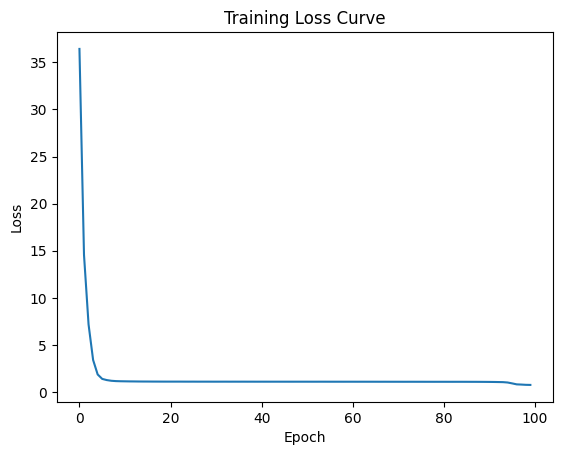

In [6]:
model = factory_model(X_trn,y_trn,"config.json")
model.fit(X_trn,y_trn)
# model의 하이퍼 파라미터를 미리 설정하고 X_trn데이터를 집어넣으면 해당 차원에 맞춰 input노드를 생성한 모델 생성
# 학습도 가능하다.


=== DynamicANNWrapper ===


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.0941


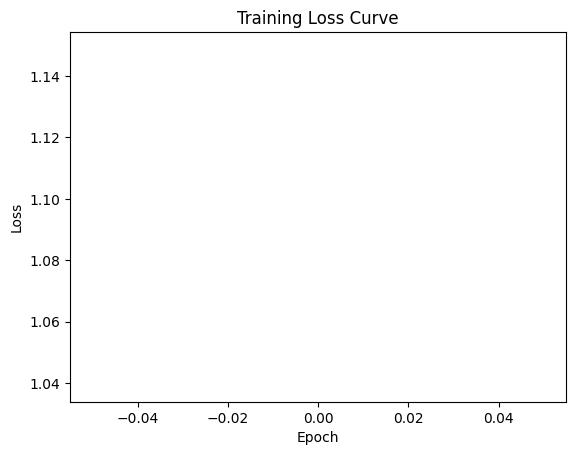


#1 Confusion Matrix: 
[[2534    0   26]
 [2536    0   96]
 [2404    0  146]]

#1 교차 검증 Accuracy: 0.3461637819684836, Precision: 0.29460604390410805, Recall: 0.3490328839869281, F1: 0.20290076903892276


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.0943


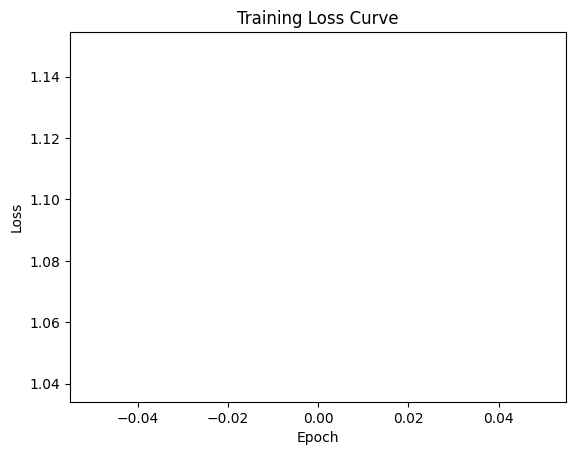


#2 Confusion Matrix: 
[[   0 2517   58]
 [   0 2389  116]
 [   0 2436  225]]

#2 교차 검증 Accuracy: 0.3376824699651208, Precision: 0.29643265068145713, Recall: 0.3460824311542267, F1: 0.21076091653275508


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.0943


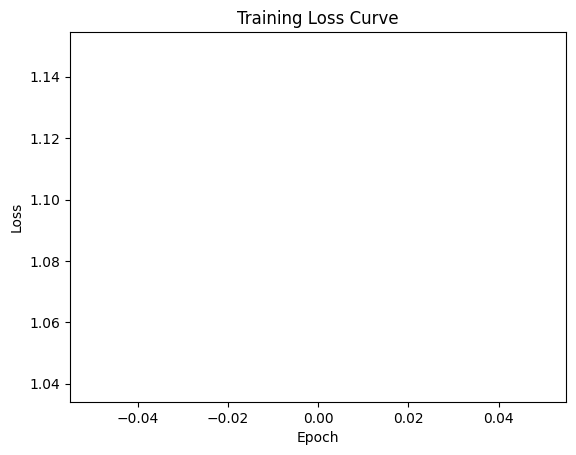


#3 Confusion Matrix: 
[[2506    0   33]
 [2554    0   92]
 [2396    0  160]]

#3 교차 검증 Accuracy: 0.34439994832708953, Precision: 0.29916955299550735, Recall: 0.34986685535587453, F1: 0.20469570699934034


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.0947


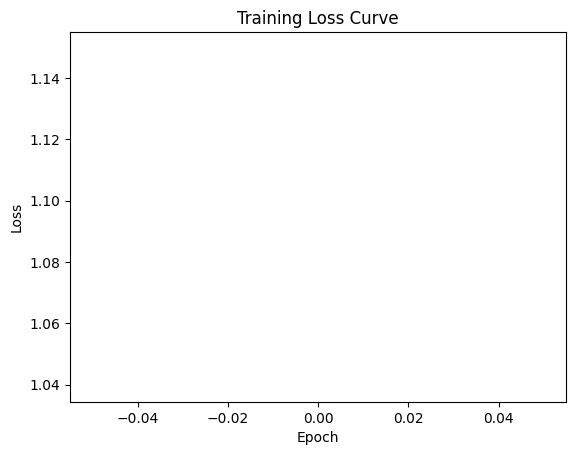


#4 Confusion Matrix: 
[[2472    0   90]
 [2404    0  182]
 [2233    0  360]]

#4 교차 검증 Accuracy: 0.3658442061749128, Precision: 0.30578282832779274, Recall: 0.3679021734189177, F1: 0.2448249742096366


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.0936


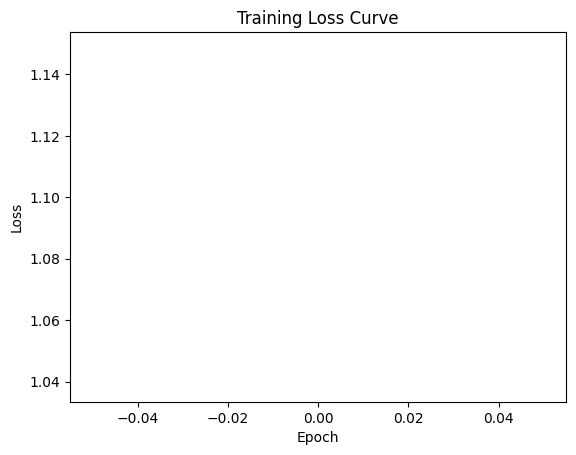


#5 Confusion Matrix: 
[[2582    8   76]
 [2342   19  172]
 [2219   16  307]]

#5 교차 검증 Accuracy: 0.3756620591654825, Precision: 0.4521621296046738, Recall: 0.36558805214095647, F1: 0.246487742030263

## 평균 검증 Accuracy: 0.35395049312021787
## 평균 검증 Precision: 0.32963064110270784
## 평균 검증 Recall: 0.3556944792113807
## 평균 검증 F1: 0.22193402176218355
## 평균 confusion_matrix: [[2018  505   56]
 [1967  481  131]
 [1850  490  239]]


,Model,Avg Accuracy,Avg Precision,Avg Recall,Avg F1,Avg Confusion Matrix
0,DynamicANNWrapper0,0.35395,0.329631,0.355694,0.221934,"[[2018, 505, 56], [1967, 481, 131], [1850, 490..."


In [10]:
df = ClfiCV(model,X_trn,y_trn,n_splits=5)
df.head()

### 모델을 미리 configW.json 파일을 여러개 만들어 확인도 가능함

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.1860


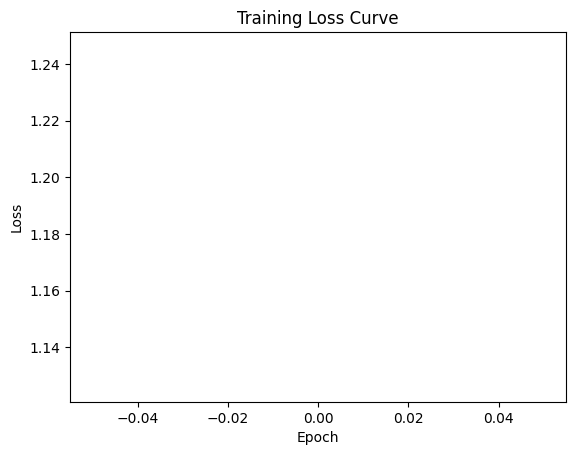

In [7]:
models = create_models(X_trn, y_trn,'configW.json',2)
model = models[0]
model.fit(X_trn,y_trn)
print(models)

### 여러 모델을 하나씩 CrossValidation 하고 결과값을 PD로 리턴해주는 함수


=== DynamicANNWrapper ===


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.0941


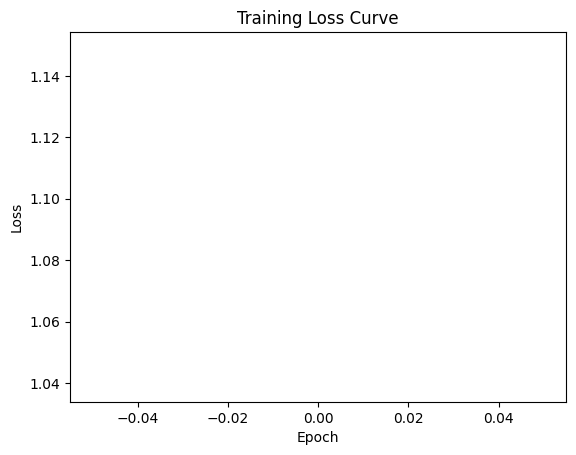


#1 Confusion Matrix: 
[[2489    0   71]
 [2471    0  161]
 [2261    0  289]]

#1 교차 검증 Accuracy: 0.35882200981658485, Precision: 0.2997971988113506, Recall: 0.3618663194444445, F1: 0.23238607474826453


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.1073


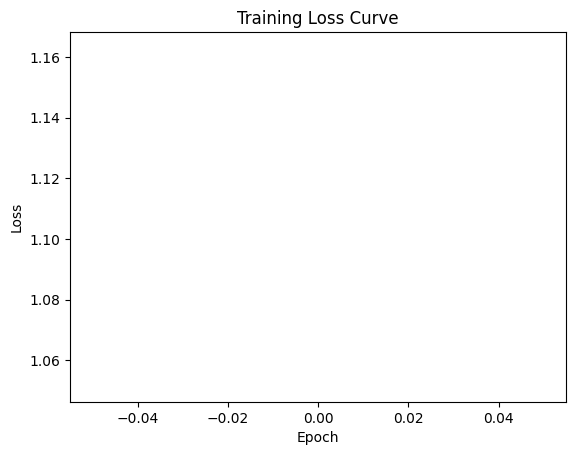


#2 Confusion Matrix: 
[[2534    1   40]
 [2417    6   82]
 [2489    3  169]]

#2 교차 검증 Accuracy: 0.3499547862033329, Precision: 0.5071158038650556, Recall: 0.3499942793819693, F1: 0.20843698511598183


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.0924


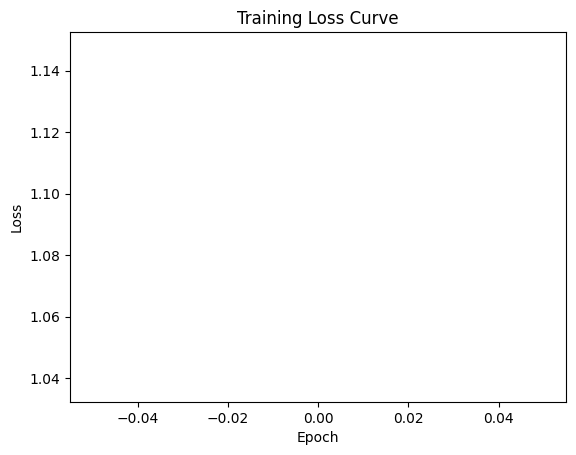


#3 Confusion Matrix: 
[[2503    0   36]
 [2546    0  100]
 [2375    0  181]]

#3 교차 검증 Accuracy: 0.3467252292985402, Precision: 0.30270923415461043, Recall: 0.3522116536542201, F1: 0.20948659826716784


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.1035


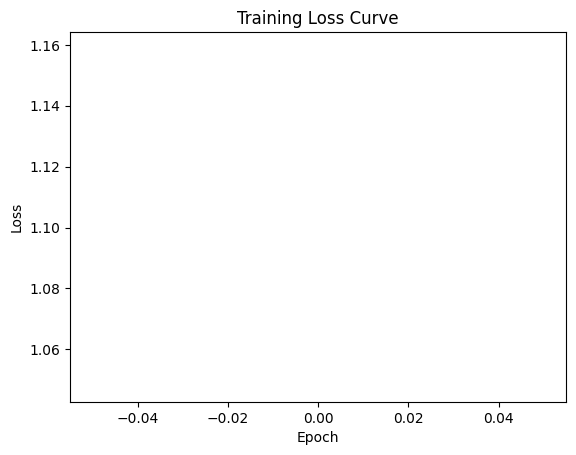


#4 Confusion Matrix: 
[[   0    0 2562]
 [   0    0 2586]
 [   0    0 2593]]

#4 교차 검증 Accuracy: 0.33496964216509495, Precision: 0.11165654738836499, Recall: 0.3333333333333333, F1: 0.16727953035288046


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.0938


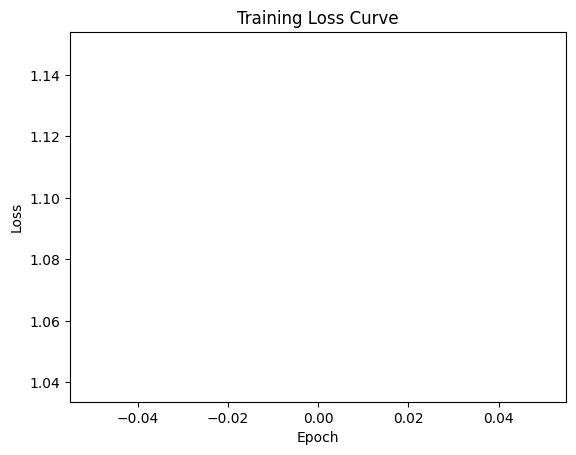


#5 Confusion Matrix: 
[[2612    0   54]
 [2393    0  140]
 [2301    0  241]]

#5 교차 검증 Accuracy: 0.36855703397493866, Precision: 0.3038457867516648, Recall: 0.3581840582096744, F1: 0.22859159605017443

## 평균 검증 Accuracy: 0.35180574029169837
## 평균 검증 Precision: 0.3050249141942093
## 평균 검증 Recall: 0.3511179288047283
## 평균 검증 F1: 0.20923615690689382
## 평균 confusion_matrix: [[2027    0  552]
 [1965    1  613]
 [1885    0  694]]

=== DynamicANNWrapper ===


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.2133


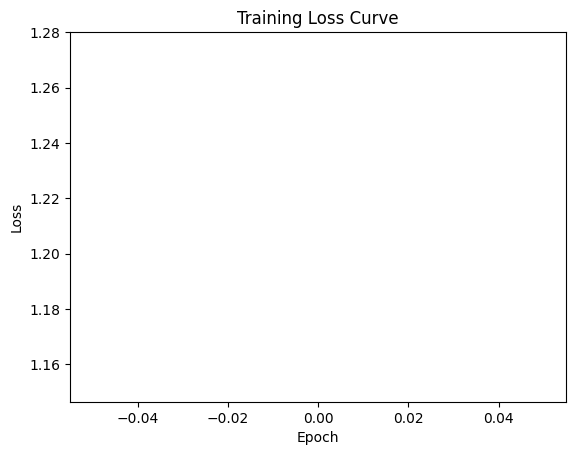


#1 Confusion Matrix: 
[[2555    0    5]
 [2604    5   23]
 [2514   10   26]]

#1 교차 검증 Accuracy: 0.3340222164815293, Precision: 0.38260020305287257, Recall: 0.33671421649333494, F1: 0.1743706466401372


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.2137


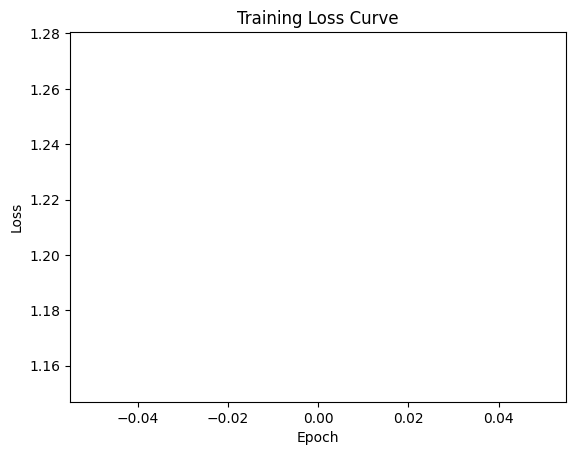


#2 Confusion Matrix: 
[[   0    0 2575]
 [   0    0 2505]
 [   0    0 2661]]

#2 교차 검증 Accuracy: 0.343754036946131, Precision: 0.11458467898204366, Recall: 0.3333333333333333, F1: 0.17054412612959047


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.2130


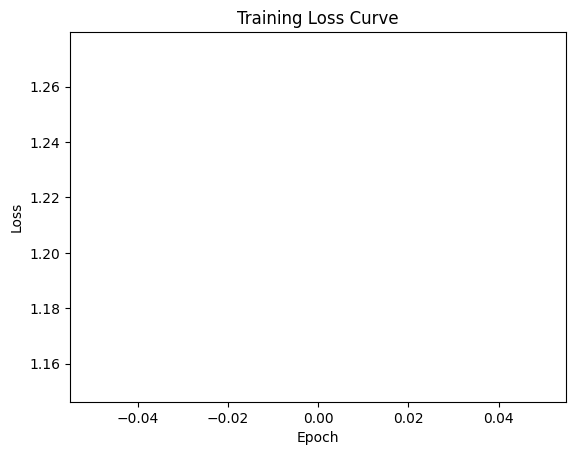


#3 Confusion Matrix: 
[[   0    0 2539]
 [   0    0 2646]
 [   0    0 2556]]

#3 교차 검증 Accuracy: 0.3301898979460018, Precision: 0.11006329931533393, Recall: 0.3333333333333333, F1: 0.16548509274545983


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.2102


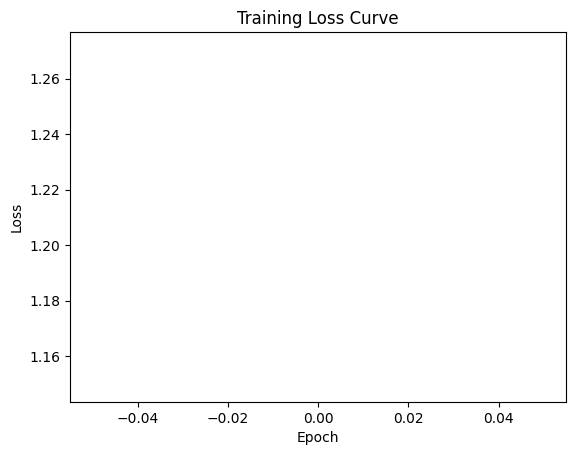


#4 Confusion Matrix: 
[[   0 2560    2]
 [   0 2581    5]
 [   0 2581   12]]

#4 교차 검증 Accuracy: 0.33496964216509495, Precision: 0.32193959386941845, Recall: 0.33423145206117927, F1: 0.1699881525482718


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/1, Average Training Loss: 1.2112


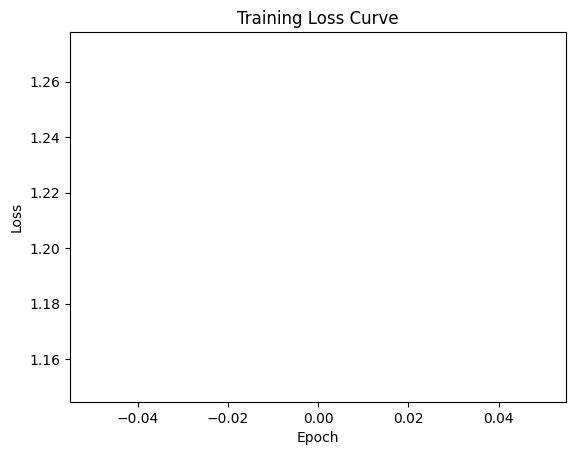


#5 Confusion Matrix: 
[[   0    0 2666]
 [   0    0 2533]
 [   0    0 2542]]

#5 교차 검증 Accuracy: 0.3283813460793179, Precision: 0.10946044869310596, Recall: 0.3333333333333333, F1: 0.16480274887354532

## 평균 검증 Accuracy: 0.334263427923615
## 평균 검증 Precision: 0.2077296447825549
## 평균 검증 Recall: 0.3341891337109028
## 평균 검증 F1: 0.16903815338740094
## 평균 confusion_matrix: [[ 511  512 1557]
 [ 520  517 1542]
 [ 502  518 1559]]


c:\Users\user\miniconda3\envs\cudaJung\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Avg Accuracy,Avg Precision,Avg Recall,Avg F1,Avg Confusion Matrix
0,DynamicANNWrapper0,0.351806,0.305025,0.351118,0.209236,"[[2027, 0, 552], [1965, 1, 613], [1885, 0, 694]]"
1,DynamicANNWrapper0,0.334263,0.207730,0.334189,0.169038,"[[511, 512, 1557], [520, 517, 1542], [502, 518..."


In [8]:
df = models_cv(models,X_trn,y_trn)
df.head()

### 성능평가도 가능함

In [ ]:
predictions = model.predict(X_tst)
accuracy = accuracy_score(y_tst, predictions)
confusion_matrix1 = multilabel_confusion_matrix(y_tst, predictions)
confusion_matrix2 = confusion_matrix(y_tst, predictions)
print(accuracy)
print()
print(confusion_matrix2)
print()
print(confusion_matrix1)